# Bank Customer Churn Prediction-I

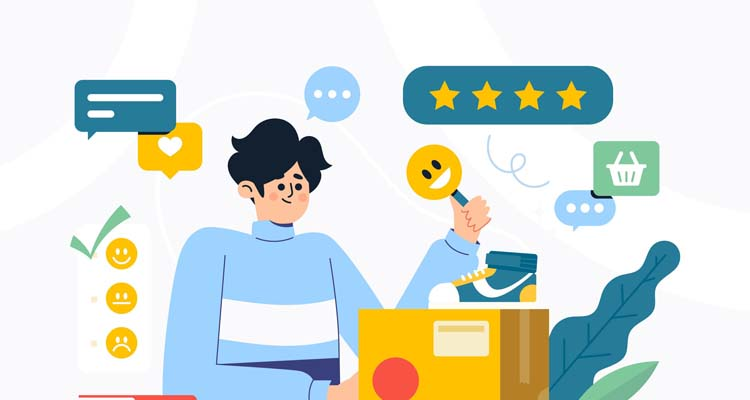

## `Importing libraries`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

## `Reading the dataset`

In [3]:
data=pd.read_csv('Bank Customer Churn Prediction.csv')

In [4]:
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data.sample(5)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
7076,15766906,742,France,Female,25,4,132116.13,2,1,0,129933.50,0
3273,15646091,560,Spain,Female,43,4,95140.44,2,1,0,123181.44,1
5674,15767598,540,Spain,Male,28,8,0.00,2,0,0,197588.32,0
2536,15752026,691,France,Male,58,3,0.00,1,0,1,194930.30,1
1516,15701333,646,France,Female,37,7,96558.66,1,0,0,163427.18,0


In [6]:
data.tail()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [7]:
data.shape

(10000, 12)

In [8]:
data.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [10]:
data.nunique()

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64

In [11]:
data.country.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [12]:
data[['credit_score','balance','estimated_salary']].describe()

,credit_score,balance,estimated_salary
count,10000.000000,10000.000000,10000.000000
mean,650.528800,76485.889288,100090.239881
std,96.653299,62397.405202,57510.492818
min,350.000000,0.000000,11.580000
25%,584.000000,0.000000,51002.110000
50%,652.000000,97198.540000,100193.915000
75%,718.000000,127644.240000,149388.247500
max,850.000000,250898.090000,199992.480000


In [13]:
data['balance'].groupby(data.churn).describe()

,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,7963.0,72745.296779,62848.040701,0.0,0.00,92072.68,126410.28,221532.80
1,2037.0,91108.539337,58360.794816,0.0,38340.02,109349.29,131433.33,250898.09


In [14]:
data['estimated_salary'].groupby(data.churn).describe()

,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,7963.0,99738.391772,57405.586966,90.07,50783.49,99645.04,148609.955,199992.48
1,2037.0,101465.677531,57912.418071,11.58,51907.72,102460.84,152422.910,199808.10


In [15]:
data['credit_score'].groupby(data.churn).describe()

,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,7963.0,651.853196,95.653837,405.0,585.0,653.0,718.0,850.0
1,2037.0,645.351497,100.321503,350.0,578.0,646.0,716.0,850.0


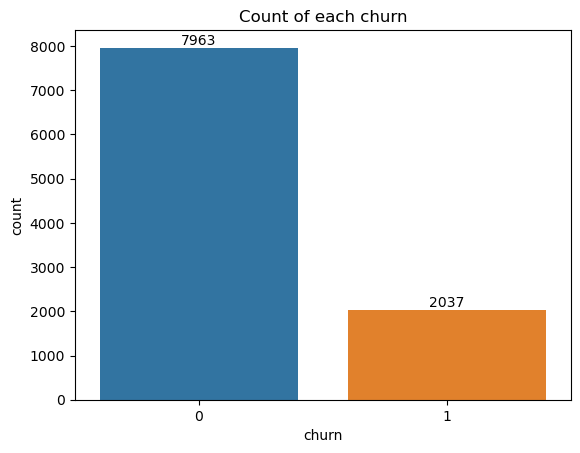

In [16]:
ax=sns.countplot(x=data.churn,data=data)
for i in ax.containers:
    ax.bar_label(i)
plt.title('Count of each churn')
plt.show()

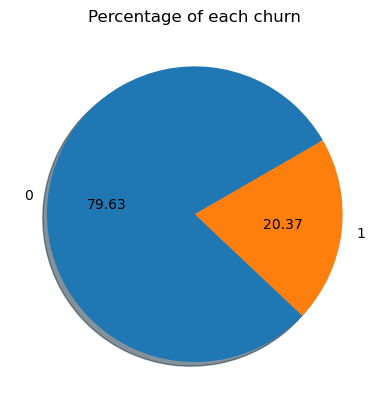

In [17]:
plt.pie(x=data.churn.value_counts(),autopct="%.2f",labels=data.churn.value_counts().index,startangle=30,
       shadow=True)
plt.title('Percentage of each churn')
plt.show()

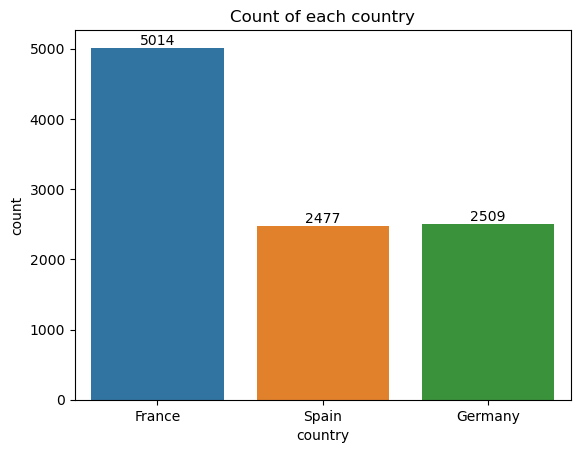

In [18]:
ax=sns.countplot(x=data.country,data=data)
for i in ax.containers:
    ax.bar_label(i)
plt.title('Count of each country')
plt.show()

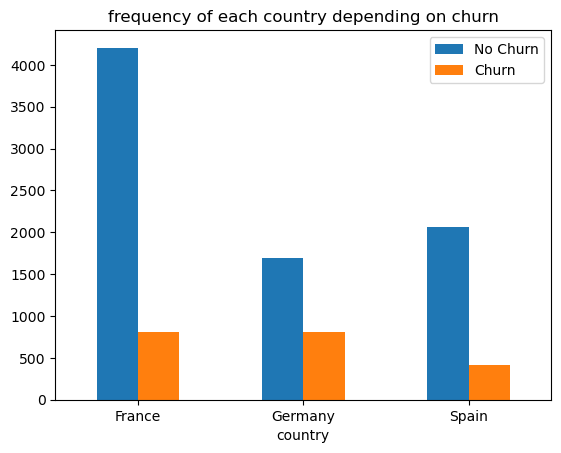

In [19]:
cnty=pd.crosstab(data.country,data.churn)
cnty.plot(kind="bar")
plt.xticks(rotation=0)
plt.legend(["No Churn", "Churn"])
plt.title('frequency of each country depending on churn')
plt.show()

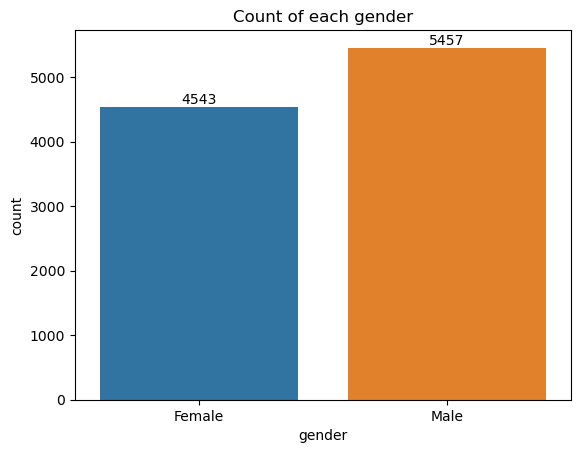

In [20]:
ax=sns.countplot(x=data.gender,data=data)
for i in ax.containers:
    ax.bar_label(i)
plt.title('Count of each gender')
plt.show()

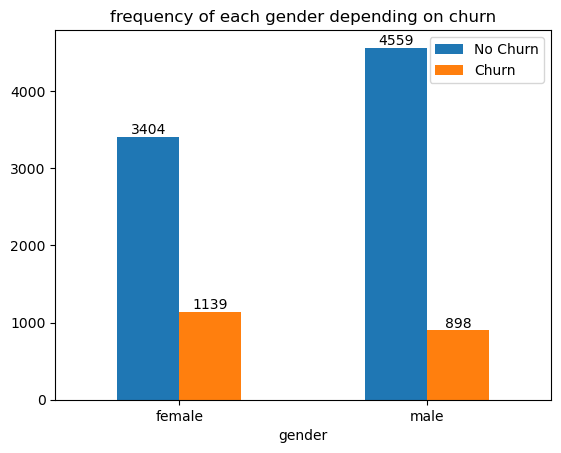

In [21]:
gen=pd.crosstab(data.gender,data.churn)
ax=gen.plot(kind="bar")
for i in ax.containers:
    ax.bar_label(i)
plt.xticks([0,1],['female','male'],rotation=0)
plt.legend(["No Churn", "Churn"])
plt.title('frequency of each gender depending on churn')
plt.show()

## `Data Preprocessing`

checking null values

In [22]:
data.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

checking duplicate values

In [23]:
data.duplicated().sum()

0

In [24]:
data.gender=data.gender.replace('Male',1)
data.gender=data.gender.replace('Female',0)
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


creating dummies

In [25]:
dummies=pd.get_dummies(data.country)
dummies.head()

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1


In [26]:
data=pd.concat([data,dummies],axis=1)
data=data.drop(['country','Spain'],axis=1)
data

,customer_id,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,France,Germany
0,15634602,619,0,42,2,0.00,1,1,1,101348.88,1,1,0
1,15647311,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0
2,15619304,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0
3,15701354,699,0,39,1,0.00,2,0,0,93826.63,0,1,0
4,15737888,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,1,39,5,0.00,2,1,0,96270.64,0,1,0
9996,15569892,516,1,35,10,57369.61,1,1,1,101699.77,0,1,0
9997,15584532,709,0,36,7,0.00,1,0,1,42085.58,1,1,0
9998,15682355,772,1,42,3,75075.31,2,1,0,92888.52,1,0,1


## `Train Test Split`

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X=data.drop(['customer_id','churn'],axis=1)
y=data.churn

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,train_size=0.70,shuffle=True)

In [30]:
X_train

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,France,Germany
9069,619,0,32,4,175406.13,2,1,1,172792.43,0,0
2603,643,0,34,7,160426.07,1,0,1,188533.11,0,1
7738,561,1,33,6,0.00,2,0,0,173680.39,1,0
1579,618,1,41,8,37702.79,1,1,1,195775.48,0,1
5058,714,1,37,9,148466.93,2,0,1,151280.96,1,0
...,...,...,...,...,...,...,...,...,...,...,...
5734,768,1,54,8,69712.74,1,1,1,69381.05,1,0
5191,682,0,58,1,0.00,1,1,1,706.50,1,0
5390,735,0,38,1,0.00,3,0,0,92220.12,1,0
860,667,1,43,8,190227.46,1,1,0,97508.04,1,0


In [31]:
y_train

9069    1
2603    0
7738    0
1579    0
5058    0
       ..
5734    0
5191    0
5390    1
860     1
7270    0
Name: churn, Length: 7000, dtype: int64

# Scaling

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()

In [34]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## `Model`

In [35]:
from sklearn.metrics  import f1_score,accuracy_score, classification_report, confusion_matrix

In [36]:
from sklearn.model_selection import cross_val_score

In [37]:
metric=pd.DataFrame({'Model':[], 'Accuracy_score':[],'f1_score':[],'Training_score':[],'Cross validation score':[]})
metric

,Model,Accuracy_score,f1_score,Training_score,Cross validation score


### 1. Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
model=LogisticRegression(random_state=42)

In [40]:
model.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [41]:
cross_val_score(model,X_train,y_train,cv=10).mean()

0.8094285714285714

In [42]:
model.score(X_train,y_train)

0.8101428571428572

In [43]:
y_pred=model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2416
           1       0.54      0.20      0.29       584

    accuracy                           0.81      3000
   macro avg       0.69      0.58      0.59      3000
weighted avg       0.78      0.81      0.77      3000



In [45]:
metric.loc[1]=['Logistic Regression',accuracy_score(y_test,y_pred),f1_score(y_test,y_pred),model.score(X_train,y_train), cross_val_score(model,X_train,y_train,cv=10).mean()]

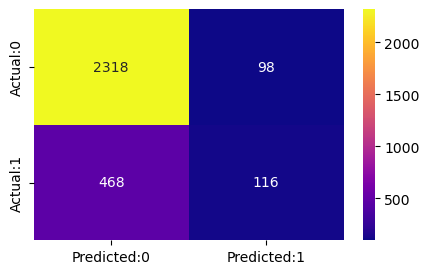

In [46]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "plasma")
plt.show()

### 2. SVM

In [47]:
from sklearn.svm import SVC

In [48]:
model=SVC(random_state=55)

In [49]:
model.fit(X_train,y_train)

SVC(random_state=55)

In [50]:
cross_val_score(model,X_train,y_train,cv=10).mean()

0.852

In [51]:
model.score(X_train,y_train)

0.8618571428571429

In [52]:
y_pred=model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2416
           1       0.81      0.39      0.52       584

    accuracy                           0.86      3000
   macro avg       0.84      0.68      0.72      3000
weighted avg       0.86      0.86      0.84      3000



In [54]:
metric.loc[2]=['SVM',accuracy_score(y_test,y_pred),f1_score(y_test,y_pred),model.score(X_train,y_train), cross_val_score(model,X_train,y_train,cv=10).mean()]

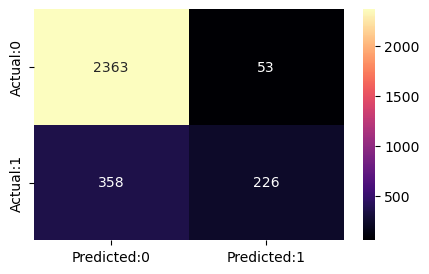

In [55]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "magma")
plt.show()

### 3. KNN

In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
model=KNeighborsClassifier(n_neighbors=3)

In [58]:
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [59]:
cross_val_score(model,X_train,y_train,cv=10).mean()

0.818

In [60]:
model.score(X_train,y_train)

0.8968571428571429

In [61]:
y_pred=model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90      2416
           1       0.58      0.40      0.47       584

    accuracy                           0.83      3000
   macro avg       0.72      0.66      0.68      3000
weighted avg       0.81      0.83      0.81      3000



In [63]:
metric.loc[3]=['KNN',accuracy_score(y_test,y_pred),f1_score(y_test,y_pred),model.score(X_train,y_train), cross_val_score(model,X_train,y_train,cv=10).mean()]

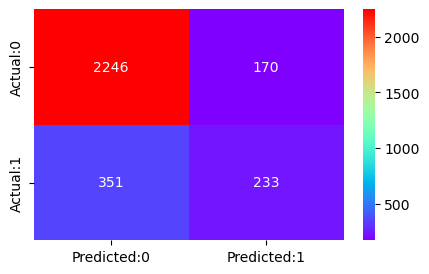

In [64]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "rainbow")
plt.show()

### 4. Decision Tree

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
model=DecisionTreeClassifier(random_state=150)

In [67]:
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=150)

In [68]:
cross_val_score(model,X_train,y_train,cv=10).mean()

0.787

In [69]:
model.score(X_train,y_train)

1.0

In [70]:
y_pred=model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [71]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      2416
           1       0.50      0.52      0.51       584

    accuracy                           0.80      3000
   macro avg       0.69      0.70      0.69      3000
weighted avg       0.81      0.80      0.81      3000



In [72]:
metric.loc[4]=['Decision Tree',accuracy_score(y_test,y_pred),f1_score(y_test,y_pred),model.score(X_train,y_train), cross_val_score(model,X_train,y_train,cv=10).mean()]

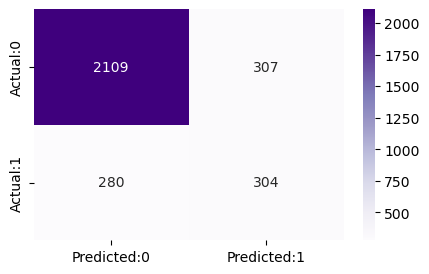

In [73]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Purples")
plt.show()

### 5. Random forest

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
model=RandomForestClassifier(n_estimators=400, random_state=42)

In [76]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=400, random_state=42)

In [77]:
cross_val_score(model,X_train,y_train,cv=10).mean()

0.8594285714285714

In [78]:
model.score(X_train,y_train)

1.0

In [79]:
y_pred=model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [80]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2416
           1       0.77      0.48      0.59       584

    accuracy                           0.87      3000
   macro avg       0.83      0.72      0.76      3000
weighted avg       0.86      0.87      0.86      3000



In [81]:
metric.loc[5]=['Random forest',accuracy_score(y_test,y_pred),f1_score(y_test,y_pred),model.score(X_train,y_train), cross_val_score(model,X_train,y_train,cv=10).mean()]

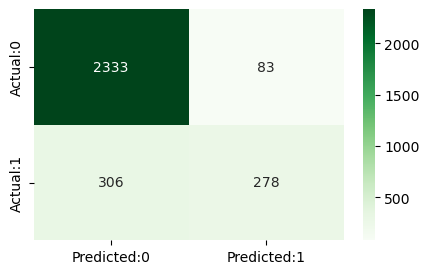

In [82]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")
plt.show()

## `Conclusion`

In [83]:
metric

,Model,Accuracy_score,f1_score,Training_score,Cross validation score
1,Logistic Regression,0.811333,0.290727,0.810143,0.809429
2,SVM,0.863000,0.523754,0.861857,0.852000
3,KNN,0.826333,0.472138,0.896857,0.818000
4,Decision Tree,0.804333,0.508787,1.000000,0.787000
5,Random forest,0.870333,0.588360,1.000000,0.859429


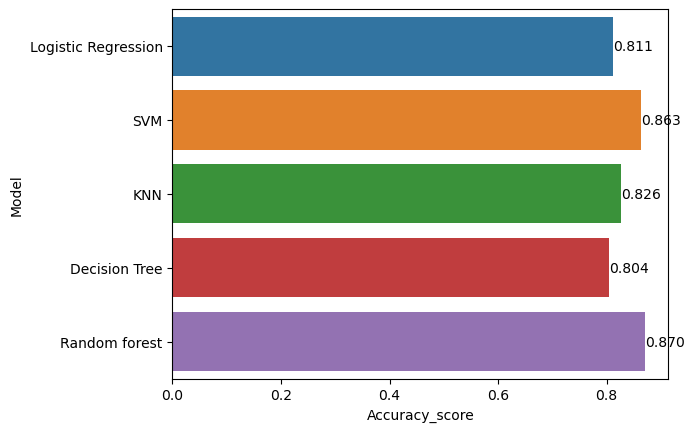

In [84]:
ax=sns.barplot(data=metric,y='Model',x='Accuracy_score')
for i in ax.containers:
    ax.bar_label(i,fmt='%.03f')

> _From the above plot, we observe that Random Forest has the highest Accuracy score among all the models._

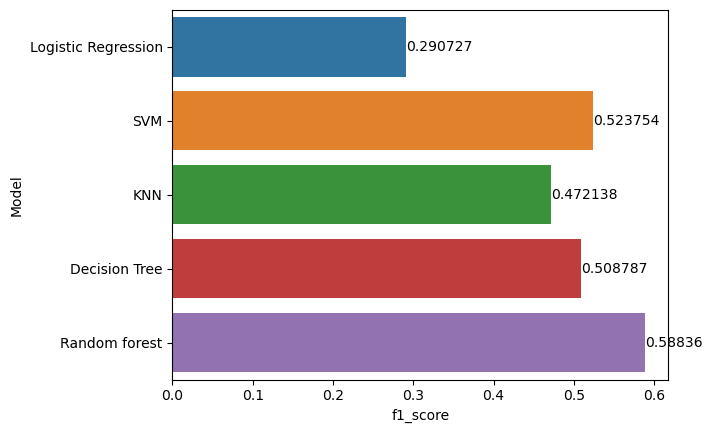

In [85]:
ax=sns.barplot(data=metric,y='Model',x='f1_score')
for i in ax.containers:
    ax.bar_label(i)

> _From the above plot, we observe that Random Forest has the highest f1 score among all the models._

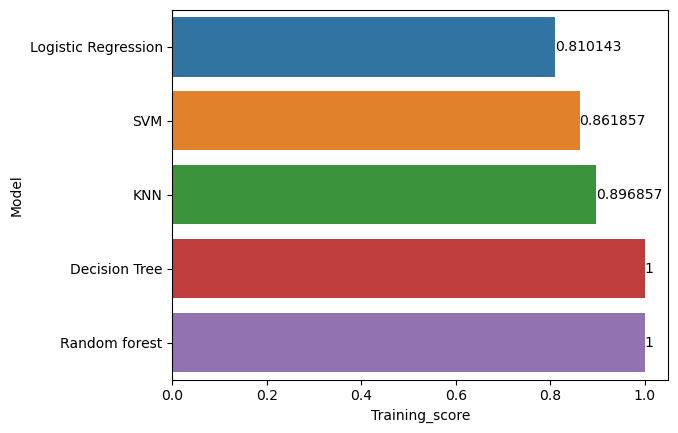

In [86]:
ax=sns.barplot(data=metric,y='Model',x='Training_score')
for i in ax.containers:
    ax.bar_label(i)

> _From the above plot, we observe that Random Forest and Decision Tree has the highest Training score among all the models._

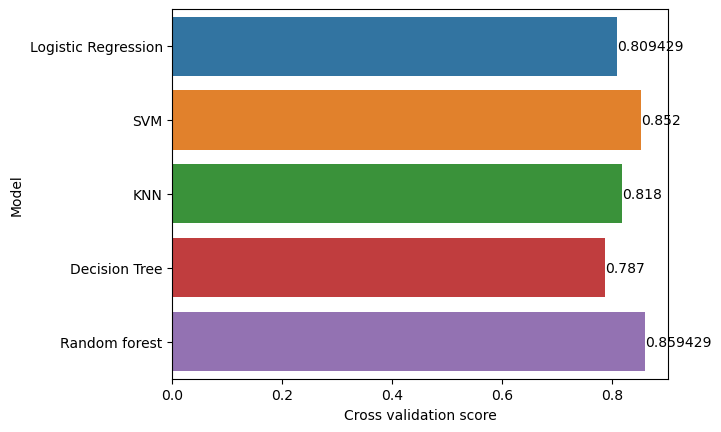

In [87]:
ax=sns.barplot(data=metric,y='Model',x='Cross validation score')
for i in ax.containers:
    ax.bar_label(i)

> _From the above plot, we observe that Random Forest has the highest Cross validation score among all the models._

## `Prediction`

In [88]:
# model used in prediction is Random Forest (you can use other model too)
def gend(sex):
    if sex.lower()=='male':
        return 1
    elif sex.lower()=='female':
        return 0
    else:
        return 'Error'

def country(cy):
    if cy.lower()=='france':
        return [1,0]
    elif cy.lower()=='germany':
        return [0,1]
    elif cy.lower()=='spain':
        return [0,0]
    else:
        return ['Error']
    
def predict(l):
    '''input=['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
           'balance', 'products_number', 'credit_card', 'active_member','estimated_salary']'''
    l=l[1:]
    cnty=l.pop(1)
    l+=country(cnty)
    l[1]=gend(l[1])
    #print(l)
    try:
        pred_data=model.predict(scaler.transform([l]))
        return "Yes" if pred_data==1 else "No"
    except ValueError:
        return "Error: Entered wrong input format"

In [89]:
predict([88855111, 120, 'Germany', 'female', 22, 1, 159999.88, 3, 1, 0, 12500])

'Yes'

In [90]:
predict([26851945, 643, 'spain', 'Male', 23, 2, 0, 1, 1, 1, 7000])

'No'